In [1]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG16


In [3]:
!pip install tf-explain

You should consider upgrading via the 'c:\anaconda\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install opencv-python

You should consider upgrading via the 'c:\anaconda\python.exe -m pip install --upgrade pip' command.


In [7]:
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity

In [8]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
images_originals = []

In [10]:
for img_path in glob.glob('./data/img/*_0.jpg'):
    images_originals.append(mpimg.imread(img_path))

In [15]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

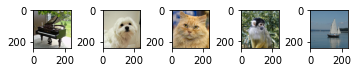

In [14]:
for i, image_o in enumerate(images_originals):
    plt.subplot(5,5,i+1)
    plt.imshow(image_o)

In [16]:
model = VGG16(weights="imagenet", include_top=True)

553467096/553467096 [==============================] - 62s 0us/step


In [17]:
input_list = ["maltese", "persian_cat", "squirrel_monkey", "grand_piano", "yawl"]
imagenet_index = ["153", "283", "382", "579", "914"]

In [18]:
explainer=GradCAM()

In [20]:
images_cams=[]

In [24]:
for l,i in zip(input_list, imagenet_index):
    #이미지 불러오기
    img=load_img('./data/img/{}_0.jpg'.format(l), target_size=(224,224))
    img=img_to_array(img) #이미지를 넘파이 배열로
    data=([img], None)
    #그래디언트 CAM실행
    grid=explainer.explain(data, model, int(i))
    #실행 후 저장
    explainer.save(grid, ".", './data/img/{}_cam.jpg'.format(l))
    

In [25]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [27]:
for img_path in glob.glob('./data/img/*_cam.jpg'):
    images_cams.append(mpimg.imread(img_path))

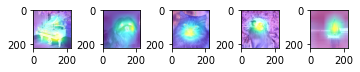

In [28]:
for i, image_c in enumerate(images_cams):
    plt.subplot(5,5,i+1)
    plt.imshow(image_c)